# Camera Specs
Nikon Camera
Auto Exposure
Exposure Time 1/5
ISO 100
Auto White Balance
Raw
6000x4000

In [85]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The visual resolution (lw/ph) of the image can be found by multiplying the scale factor (total picture height / chart height) * chart marks * 100
PictureHeight = 4000

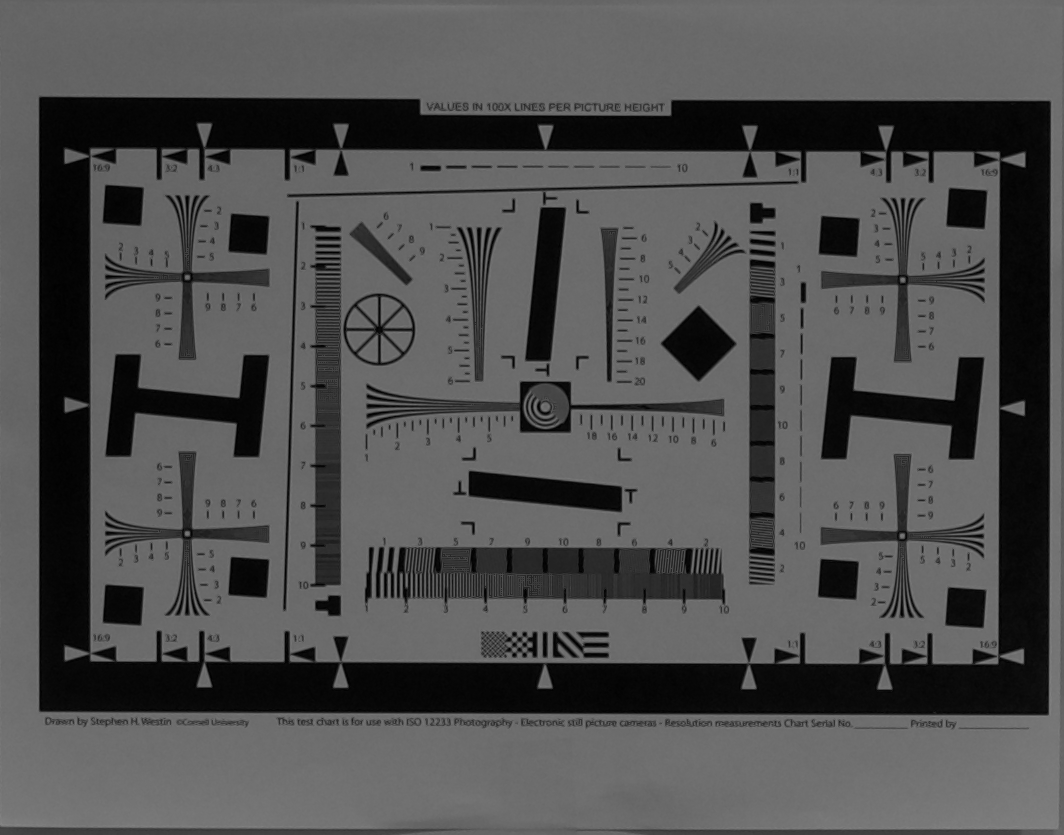

The Horizontal Resolution is 2171.290711700844
The Vertical Resolution is 1930.0361881785282


In [84]:
LowFStopImg = cv2.imread('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/5-6FData.tiff', cv2.IMREAD_GRAYSCALE)
cv2_imshow(LowFStopImg)
Chart_Height = 829
HorzChart = 4.5
VertChart = 4
ScaleFactor = PictureHeight / Chart_Height
HorzResolution = HorzChart * ScaleFactor * 100
VertResolution = VertChart * ScaleFactor * 100
print("The Horizontal Resolution is " + str(HorzResolution))
print("The Vertical Resolution is " + str( VertResolution))

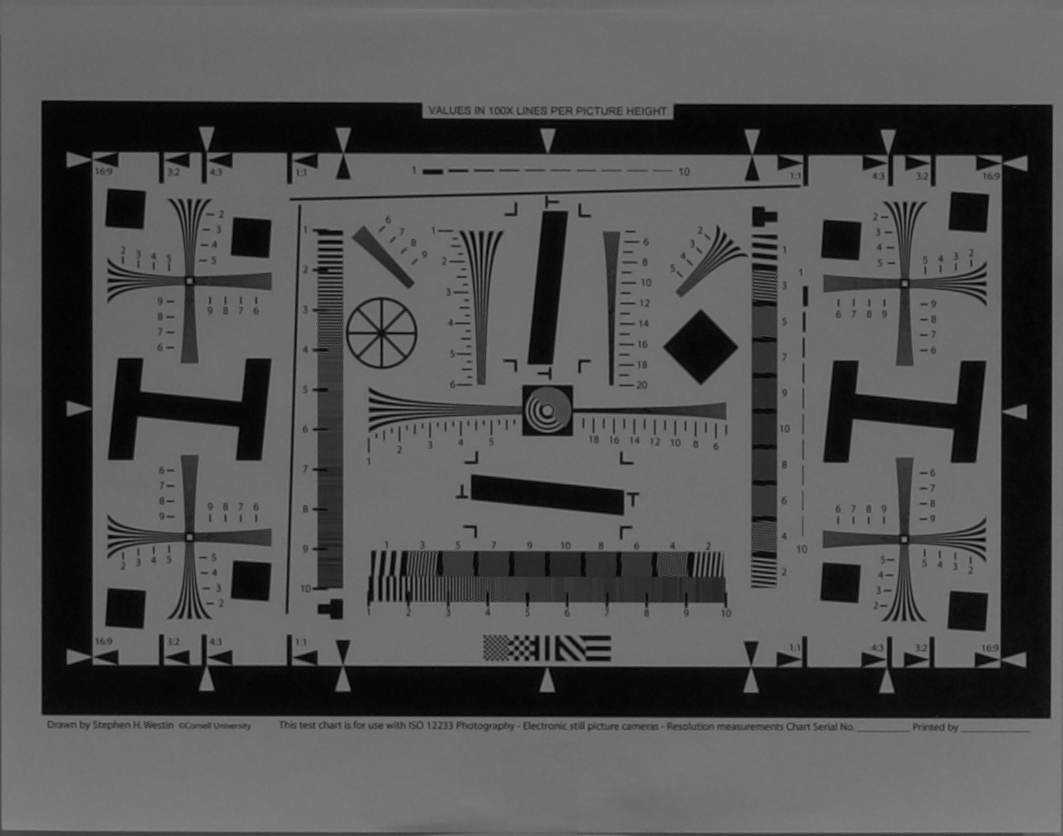

The Horizontal Resolution is 2068.1265206812654
The Vertical Resolution is 1824.8175182481752


In [83]:
MedFStopImg = cv2.imread('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/F11Data.tiff', cv2.IMREAD_GRAYSCALE)
cv2_imshow(MedFStopImg)
Chart_Height = 822
ScaleFactor = PictureHeight / Chart_Height
HorzChart = 4.25
VertChart = 3.75
ScaleFactor = PictureHeight / Chart_Height
HorzResolution = HorzChart * ScaleFactor * 100
VertResolution = VertChart * ScaleFactor * 100
print("The Horizontal Resolution is " + str(HorzResolution))
print("The Vertical Resolution is " + str( VertResolution))

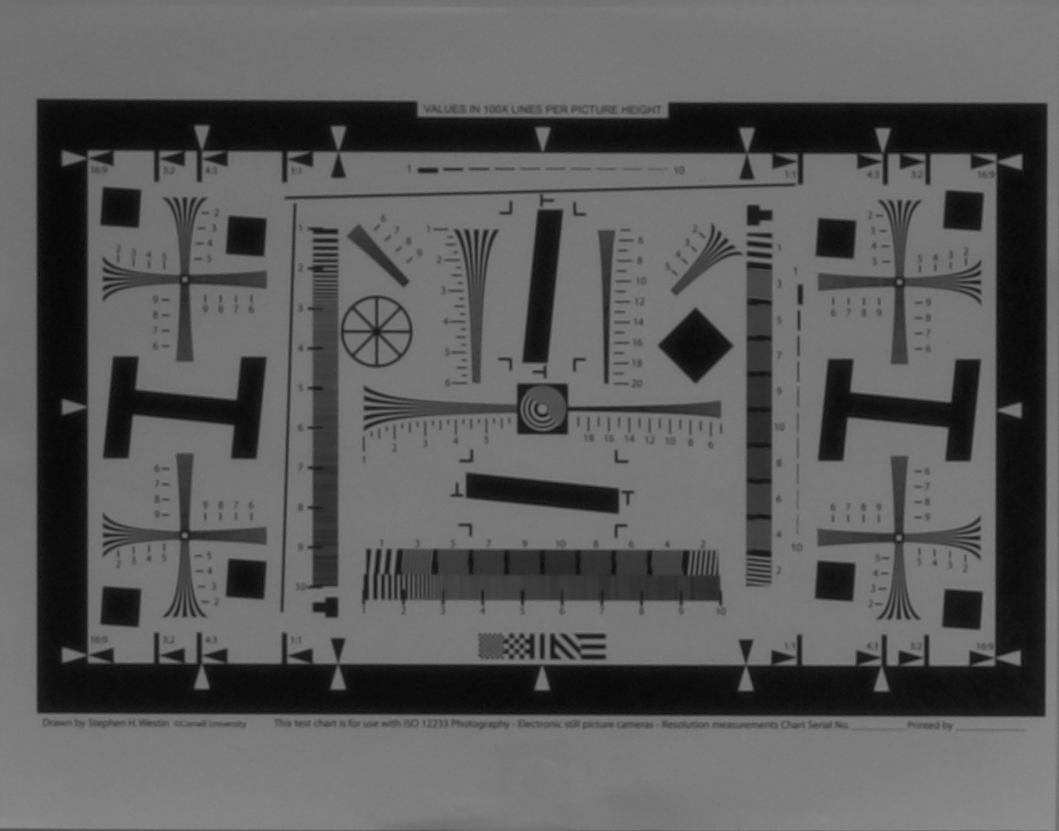

The Horizontal Resolution is 1692.8657799274486
The Vertical Resolution is 1451.0278113663846


In [ ]:
LargeFStopImg = cv2.imread('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/F22Test.tiff', cv2.IMREAD_GRAYSCALE)
cv2_imshow(LargeFStopImg)
Chart_Height = 827
ScaleFactor = PictureHeight / Chart_Height
HorzChart = 3.5
VertChart = 3
ScaleFactor = PictureHeight / Chart_Height
HorzResolution = HorzChart * ScaleFactor * 100
VertResolution = VertChart * ScaleFactor * 100
print("The Horizontal Resolution is " + str(HorzResolution))
print("The Vertical Resolution is " + str( VertResolution))

In [104]:
def find_horizontal_contrast(path):

  '''
  This function finds the horizontal contrast according to the
  ISO 12333 standard using the J1 and J2 sweeps. The function
  operates by iterating through the sweep and finding the
  min and max greyscale val in a col to find the contrast. To use this
  function, the parameters are a path to the sweep image. It will return
  an numpy array of contrast values, which can be plotted or sorted for
  the 5% limit.
  '''

  HorizontalSweep = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  rows, cols = HorizontalSweep.shape


  HorizontalSweep = np.divide(HorizontalSweep, 255)

  horz_contrast = np.zeros(cols)

  for i in range(0,cols):
    min_grey = np.min(HorizontalSweep[:,i])
    max_grey = np.max(HorizontalSweep[:,i])
    contrast = (max_grey - min_grey) / (max_grey + min_grey)
    horz_contrast[i] = contrast

  return horz_contrast

#print(find_horizontal_contrast('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/5-6FDataHorizontal1.tif'))




In [103]:
def find_vertical_contrast(path):

  '''
  This function finds the vertical contrast according to the
  ISO 12333 standard using the J1 and J2 sweeps. The function
  operates by iterating through the sweep and finding the
  min and max greyscale val in a row to find the contrast.To use this
  function, the parameters are a path to the sweep image. It will return
  an numpy array of contrast values, which can be plotted or sorted for
  the 5% limit.
  '''

  VerticalSweep = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  rows, cols = VerticalSweep.shape
  VerticalSweep = np.divide(VerticalSweep, 255)
  vert_contrast = np.zeros(rows)

  for i in range(0,rows):
    min_grey = np.min(VerticalSweep[i,:])
    max_grey = np.max(VerticalSweep[i,:])
    contrast = (max_grey - min_grey) / (max_grey + min_grey)
    vert_contrast[i] = contrast

  return vert_contrast


#print(find_vertical_contrast('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/5-6FDataVertical.tif'))


In [112]:
def plot_functions(h_contrast,v_contrast):
  new_x_axis = np.linspace(500, 4500, len(h_contrast))
  plt.plot(new_x_axis,h_contrast)
  plt.plot(new_x_axis,v_contrast)
  plt.axhline(y=0.05, color='r', linestyle='--')
  plt.xlabel('Line Widths Picture Height')
  plt.ylabel('Contrast')
  plt.title('Limiting Contrast of Camera')
  plt.legend(['Horizontal Contrast', 'Vertical Contrast', "Limiting Resolution"])
  plt.show()

##Below is messy test code


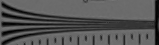

In [90]:
HorizontalSweep = cv2.imread('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/5-6FDataHorizontal1.tif', cv2.IMREAD_GRAYSCALE)
rows, cols = HorizontalSweep.shape
cv2_imshow(HorizontalSweep)


HorizontalSweep = np.divide(HorizontalSweep, 255)

horz_contrast = np.zeros(cols)

for i in range(0,cols):
   min_grey = np.min(HorizontalSweep[:,i])
   max_grey = np.max(HorizontalSweep[:,i])
   contrast = (max_grey - min_grey) / (max_grey + min_grey)
   horz_contrast[i] = contrast




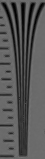

In [91]:
VerticalSweep = cv2.imread('/content/drive/Shareddrives/ISAM Project Data/Project 1/ISAM Project 1 Data/5-6FDataVertical.tif', cv2.IMREAD_GRAYSCALE)
rows, cols = VerticalSweep.shape
cv2_imshow(VerticalSweep)


VerticalSweep = np.divide(VerticalSweep, 255)

vert_contrast = np.zeros(rows)

for i in range(0,rows):
   min_grey = np.min(VerticalSweep[i,:])
   max_grey = np.max(VerticalSweep[i,:])
   contrast = (max_grey - min_grey) / (max_grey + min_grey)
   vert_contrast[i] = contrast



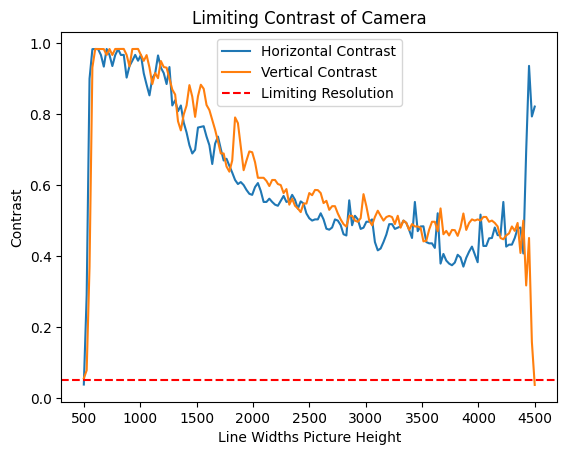

In [113]:
plot_functions(horz_contrast,vert_contrast)

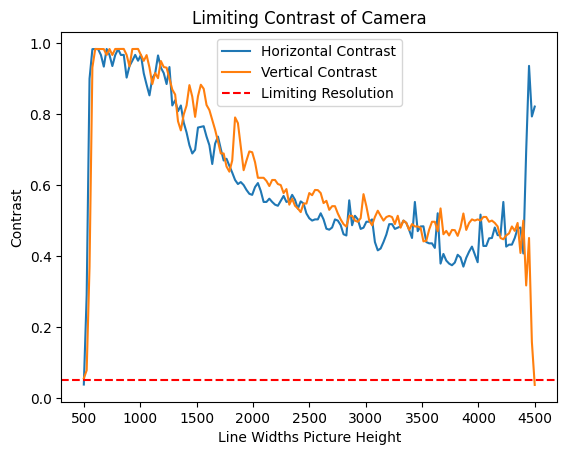

In [111]:
new_x_axis = np.linspace(500, 4500, len(horz_contrast))
plt.plot(new_x_axis,horz_contrast)
plt.plot(new_x_axis,vert_contrast)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xlabel('Line Widths Picture Height')
plt.ylabel('Contrast')
plt.title('Limiting Contrast of Camera')
plt.legend(['Horizontal Contrast', 'Vertical Contrast', "Limiting Resolution"])
plt.show()